### Classification Models

In [1]:
!pip install -U imbalanced-learn
!pip install xgboost
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from numpy import std
import time 
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from collections import Counter 
from imblearn.over_sampling import SMOTENC
from scipy.stats import shapiro 

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.7/site-packages (0.8.1)


##### Import Dataset

In [2]:
import pandas as pd
df = pd.read_csv ('YelpDataset.csv', index_col = 0)

##### Count value of Stars attribute to verify imbalance

In [3]:
df['stars'].value_counts()

4    5835
3    1186
5     302
2      81
1      17
Name: stars, dtype: int64

#### Classification Algorithms with Imbalanced Dataset 

##### Seperate the data into Train and Test

In [4]:
x = df.drop('stars', axis = 1)
y = df['stars']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
print(Counter(y_train))
print(Counter(y_test))


Counter({4: 4072, 3: 824, 5: 227, 2: 59, 1: 12})
Counter({4: 1763, 3: 362, 5: 75, 2: 22, 1: 5})


In [5]:
def convert(data):
    encode = LabelEncoder()
    data['business_id'] = encode.fit_transform(data.business_id)
    data['city'] = encode.fit_transform(data.city)
    data['state'] = encode.fit_transform(data.state)
    data['categories'] = encode.fit_transform(data.categories)
    data['review_id'] = encode.fit_transform(data.review_id)
    data['date'] = encode.fit_transform(data.date)
    data['text'] = encode.fit_transform(data.text)
    data=data.fillna(-999)
    return data

x_train = convert(x_train)
x_test = convert(x_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00       362
           4       0.79      1.00      0.88      1763
           5       0.00      0.00      0.00        75

    accuracy                           0.79      2227
   macro avg       0.16      0.20      0.18      2227
weighted avg       0.63      0.79      0.70      2227



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Text(0.5, 1.0, 'Distribution of Class "Stars" before applying oversample')

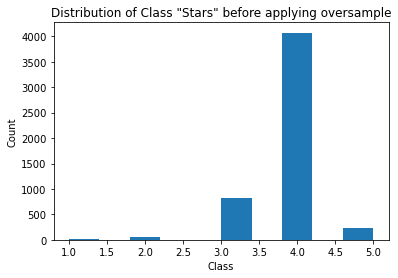

In [6]:
# Training with imbalance data 
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(x_train, y_train)
print(classification_report(y_test, classifier.predict(x_test)))

hist1 = plt.hist(y_train)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class "Stars" before applying oversample')


              precision    recall  f1-score   support

           1       0.08      0.20      0.12         5
           2       0.05      0.36      0.09        22
           3       0.24      0.09      0.13       362
           4       0.88      0.63      0.73      1763
           5       0.05      0.48      0.10        75

    accuracy                           0.53      2227
   macro avg       0.26      0.35      0.23      2227
weighted avg       0.74      0.53      0.61      2227



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.0, 'Distribution of Class "Stars" after applying oversample')

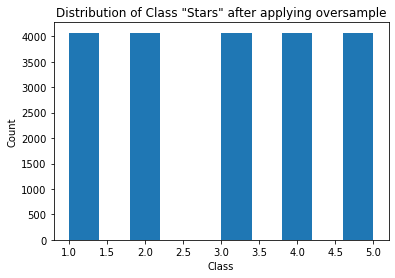

In [7]:
# Create an oversampled training data
smote = SMOTENC([4,5], random_state = 42)
x_oversample, y_oversample = smote.fit_resample(x_train, y_train)

# Training with oversampled data 
classifier_o = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier_o.fit(x_oversample, y_oversample)
print(classification_report(y_test, classifier_o.predict(x_test)))

hist2 = plt.hist(y_oversample)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class "Stars" after applying oversample')

In [8]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

In [9]:
accuracyforest = (accuracy_score(y_test, y_pred)*100)
print('Accuracy is ', str(round(accuracyforest, 3)))

Accuracy is  81.365


In [10]:
rooterror = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error(root-mean-square-error):%f" % (rooterror))

Root Mean Square Error(root-mean-square-error):0.470504


In [11]:
#View confusion Matrix for test data and predictions 
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[   4    0    1    0    0]
 [   0    0    9   13    0]
 [   1    0   92  269    0]
 [   0    0   48 1715    0]
 [   0    0   11   63    1]]


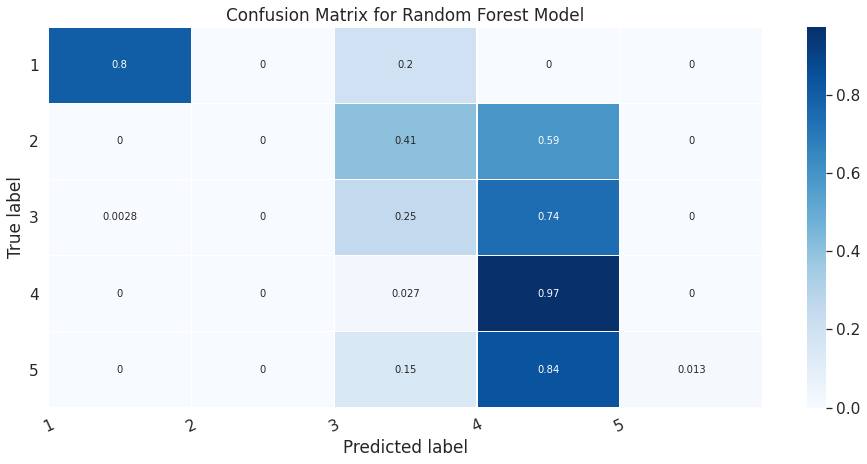

In [12]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float')/ matrix.sum(axis = 1)[:, np.newaxis]

plt.figure(figsize = (16, 7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size': 10}, 
           cmap = plt.cm.Blues, linewidths = 0.2)

class_names = ['1', '2', '3', '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 =tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('output14.png', dpi = 250, bbox_inches = 'tight')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00        22
           3       0.57      0.25      0.35       362
           4       0.83      0.97      0.90      1763
           5       1.00      0.01      0.03        75

    accuracy                           0.81      2227
   macro avg       0.64      0.41      0.42      2227
weighted avg       0.79      0.81      0.77      2227



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### K-Fold Cross Validation for Random Forest

In [14]:
model = RandomForestClassifier(random_state=42)
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
kf.get_n_splits(x)

i = 1 
print("Confusion Matrix:")
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    x_train = convert(x_train)
    x_test = convert(x_test)
    
    x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)
    model.fit(x_train, y_train)
    print (i, "\n", confusion_matrix(y_test_kfold, model.predict(x_test)))
    i = i + 1
    print(10 * '#')

Confusion Matrix:


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

1 
 [[   0    0    2    2    0]
 [   0    0    5   10    0]
 [   0    0   59  188    1]
 [   1    1  104 1063    0]
 [   1    0   10   38    0]]
##########


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

2 
 [[   1    0    0    0    0]
 [   0    0    3   14    0]
 [   2    2   32  177    1]
 [   1    0   53 1139    2]
 [   0    0    8   49    0]]
##########


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

3 
 [[   1    0    5    1    0]
 [   0    0    4   11    1]
 [   0    0   54  178    0]
 [   1    0  111 1054    1]
 [   1    0   10   51    0]]
##########


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

4 
 [[   0    0    1    2    0]
 [   1    0    3   16    0]
 [   3    0   58  213    0]
 [   0    0   90 1023    0]
 [   0    0   12   62    0]]
##########


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

5 
 [[   1    0    1    0    0]
 [   0    0    2   10    1]
 [   0    0   25  192    1]
 [   0    0   32 1158    1]
 [   0    0    2   55    3]]
##########


In [15]:
y_pred_kfold = model.predict(x_test)

In [16]:
print(classification_report(y_test_kfold, y_pred_kfold))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00        13
           3       0.40      0.11      0.18       218
           4       0.82      0.97      0.89      1191
           5       0.50      0.05      0.09        60

    accuracy                           0.80      1484
   macro avg       0.54      0.33      0.36      1484
weighted avg       0.74      0.80      0.74      1484



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
x = convert(x)
score = cross_val_score(model, x, y, cv = kf)
# score
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.90 accuracy with a standard deviation of 0.01
